In [328]:
import pandas as pd
import numpy as np
import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [329]:
df = pd.read_csv("predict_state_total1.csv")
df.fillna(0,inplace= True)
df.head(10)

,year,state,city,suspect_death_num,equipment_purchase,police_death_state_num,state_revenue_estimate,poverty_rate_state,policy_restrict_num
0,2000,ak,ambler,1,0.0,0.0,6518.82,4.0,0.0
1,2000,ak,anchorage,1,0.0,0.0,6518.82,4.0,3.0
2,2000,ak,fairbanks,1,0.0,0.0,6518.82,4.0,0.0
3,2000,ak,ketchikan,1,0.0,0.0,6518.82,4.0,0.0
4,2000,al,birmingham,1,9417.0,1.0,6495.53,24.0,1.0
5,2000,al,dothan,1,9417.0,1.0,6495.53,24.0,0.0
6,2000,al,fort payne,1,9417.0,1.0,6495.53,24.0,0.0
7,2000,al,huntsville,1,9417.0,1.0,6495.53,24.0,0.0
8,2000,al,jack,1,9417.0,1.0,6495.53,24.0,0.0
9,2000,al,montgomery,2,9417.0,1.0,6495.53,24.0,0.0


In [330]:
df.head()
df.shape

(23775, 9)

In [331]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
df2 = pd.read_csv('predict_state_total.csv', names=['value'], header=0)

In [332]:
df2.head()

value
2000 ak ambler     1 NaN        NaN  6518.82 4.0     NaN
        anchorage  1 NaN        NaN  6518.82 4.0     3.0
        fairbanks  1 NaN        NaN  6518.82 4.0     NaN
        ketchikan  1 NaN        NaN  6518.82 4.0     NaN
     al birmingham 1 9417.00    1.0  6495.53 24.0    1.0

In [333]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

df2 = pd.read_csv('predict_state_total1.csv')

In [334]:
df2.fillna(0,inplace= True)
df2.head()

,year,state,city,suspect_death_num,equipment_purchase,police_death_state_num,state_revenue_estimate,poverty_rate_state,policy_restrict_num
0,2000,ak,ambler,1,0.0,0.0,6518.82,4.0,0.0
1,2000,ak,anchorage,1,0.0,0.0,6518.82,4.0,3.0
2,2000,ak,fairbanks,1,0.0,0.0,6518.82,4.0,0.0
3,2000,ak,ketchikan,1,0.0,0.0,6518.82,4.0,0.0
4,2000,al,birmingham,1,9417.0,1.0,6495.53,24.0,1.0


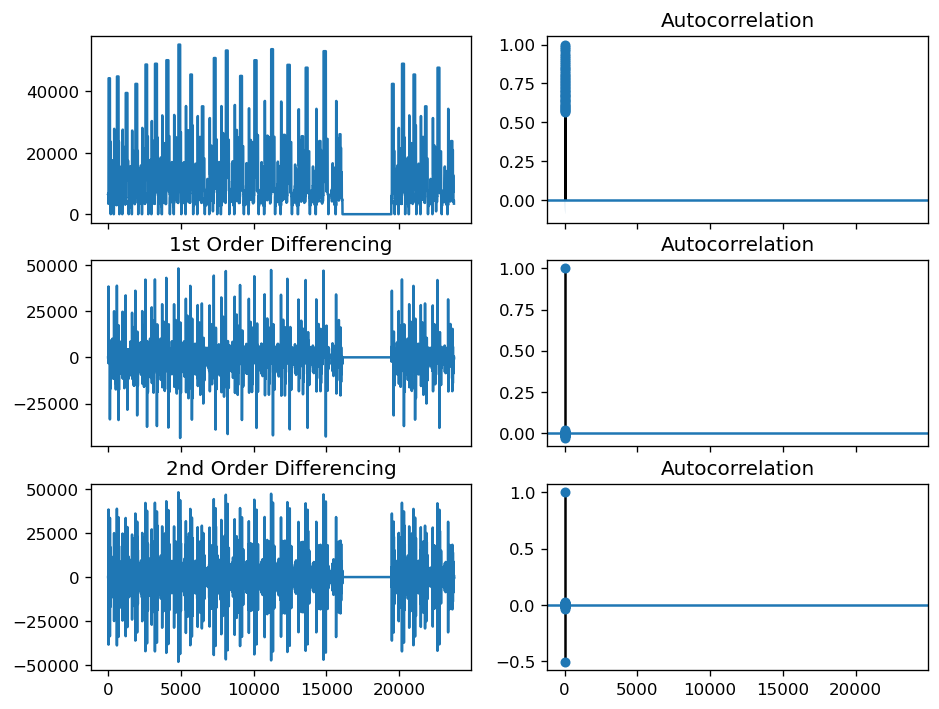

In [335]:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df2['state_revenue_estimate']); axes[0,1].set_title('Original Series')
plot_acf(df2['state_revenue_estimate'], ax=axes[0, 1])

axes[1, 0].plot(df2['state_revenue_estimate'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2['state_revenue_estimate'].diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df2['state_revenue_estimate'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2['state_revenue_estimate'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [336]:
train, test = train_test_split(df, test_size = 0.3)

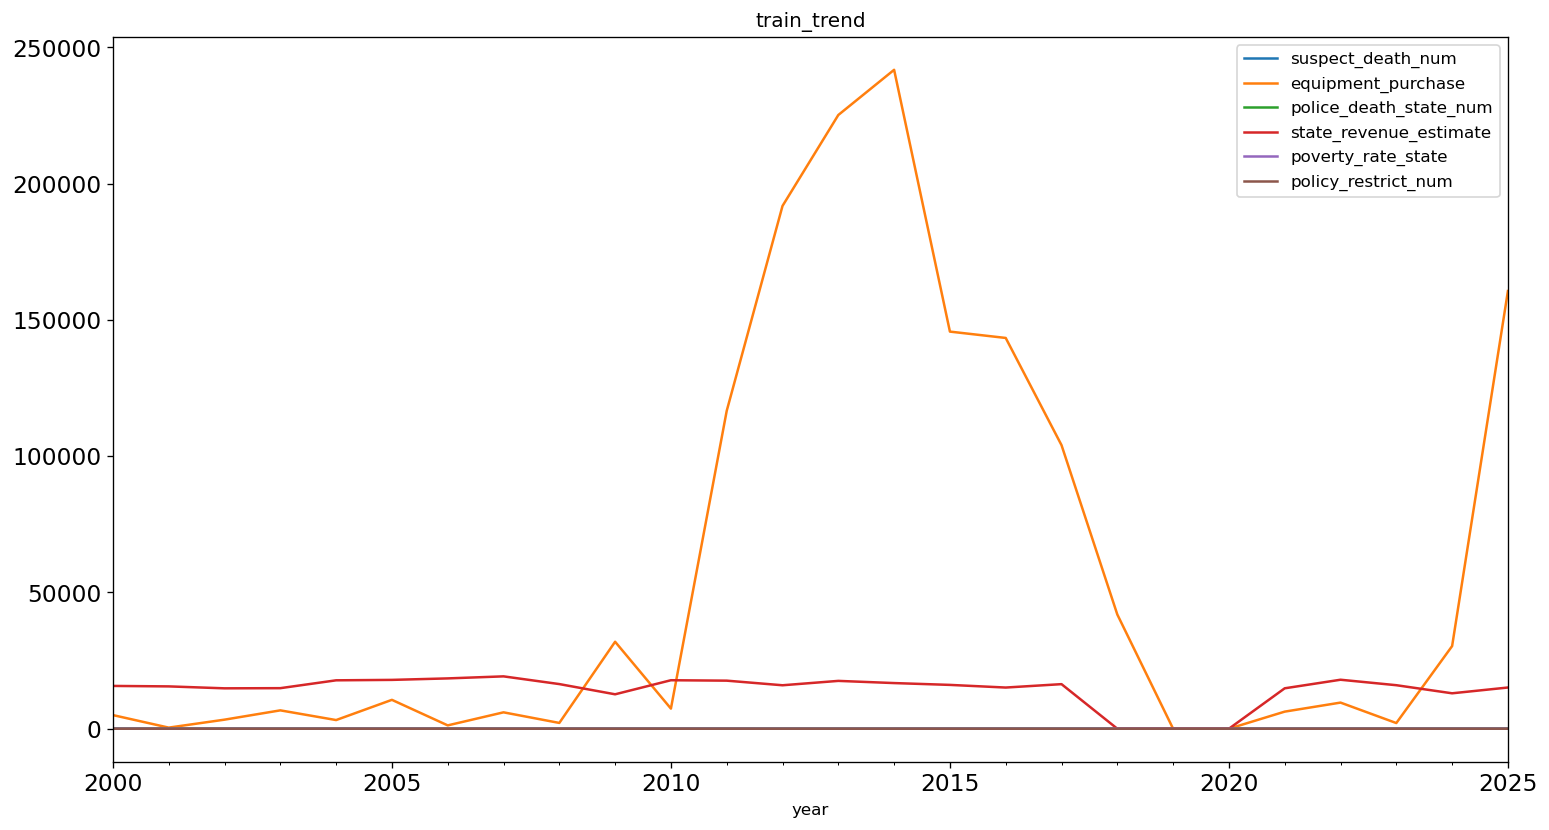

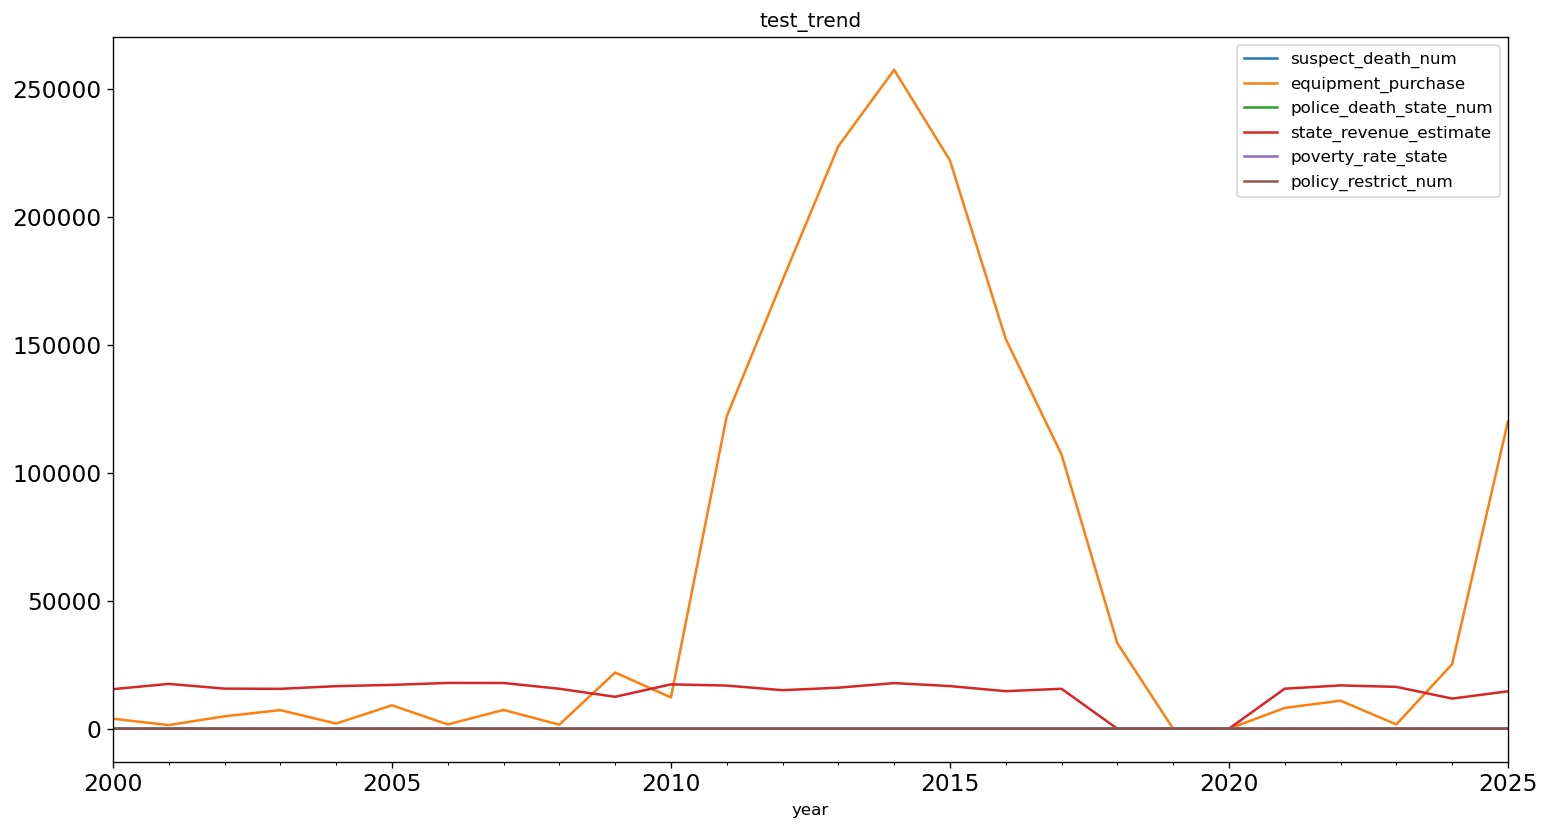

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
 
df['year'] = pd.to_datetime(df['year'], format='%Y') 
df.index = df['year']
df = df.resample('Y').mean() 
 
train['year'] = pd.to_datetime(train['year'], format='%Y')
train.index = train['year']
train = train.resample('Y').mean()
 
test['year'] = pd.to_datetime(test['year'], format='%Y')
test.index = test['year']
test = test.resample('Y').mean()

train.plot(figsize=(15,8), title= 'train_trend', fontsize=14)
test.plot(figsize=(15,8), title= 'test_trend', fontsize=14)
plt.show()

In [338]:
train.head()

,suspect_death_num,equipment_purchase,police_death_state_num,state_revenue_estimate,poverty_rate_state,policy_restrict_num
year,,,,,,
2000-12-31,1.608696,5002.010870,6.211957,15704.241766,26.065217,0.570652
2001-12-31,1.669399,403.073607,7.795082,15534.295738,26.054645,0.573770
2002-12-31,1.587699,3324.336196,5.391800,14823.494761,26.539863,0.510251
2003-12-31,1.512987,6739.263680,7.298701,14882.765216,26.036797,0.426407
2004-12-31,1.662005,3177.839441,6.757576,17763.176317,26.002331,0.550117


In [339]:
dt1 = np.asarray(train['equipment_purchase'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]

In [296]:
y1.head()

,suspect_death_num,equipment_purchase,police_death_state_num,state_revenue_estimate,poverty_rate_state,policy_restrict_num,naive
year,,,,,,,
2000-12-31,1.461140,3108.056995,5.953368,15402.879585,25.031088,0.564767,0.0
2001-12-31,1.710526,1069.034167,8.293860,16975.898158,25.456140,0.710526,0.0
2002-12-31,1.665138,6106.747339,4.990826,13411.648670,26.009174,0.577982,0.0
2003-12-31,1.689189,12339.928829,7.297297,14970.131667,26.265766,0.414414,0.0
2004-12-31,1.683128,3196.689547,6.777778,17153.239671,25.987654,0.576132,0.0


Naive Forecast times series

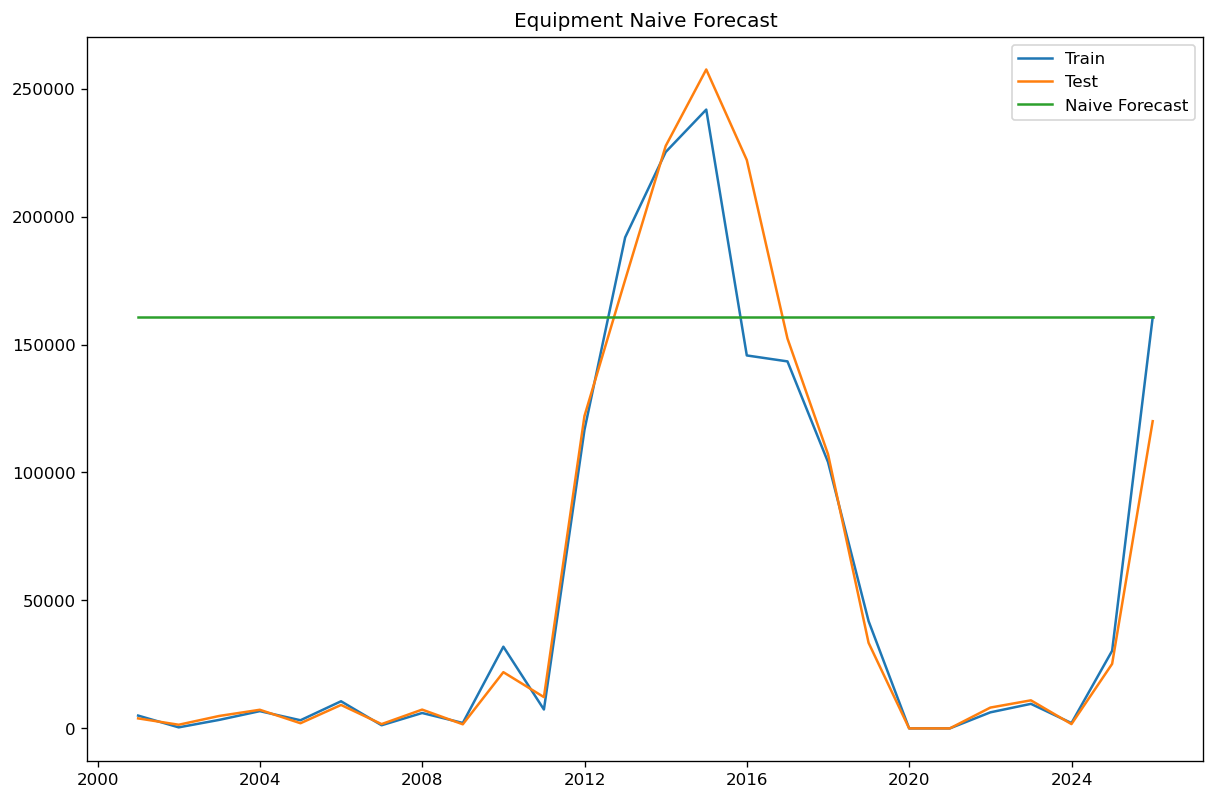

In [345]:
dt1 = np.asarray(train['equipment_purchase'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['equipment_purchase'], label='Train')
plt.plot(test.index, test['equipment_purchase'], label='Test')
plt.plot(y1.index, y1['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Equipment Naive Forecast")
plt.show()

In [298]:
test['equipment_purchase'].fillna(0,inplace = True)
y1['naive'].fillna(0,inplace = True)

In [310]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test['equipment_purchase'], y1['naive']))
print(rms)

102363.54975731406


Simple average time series 

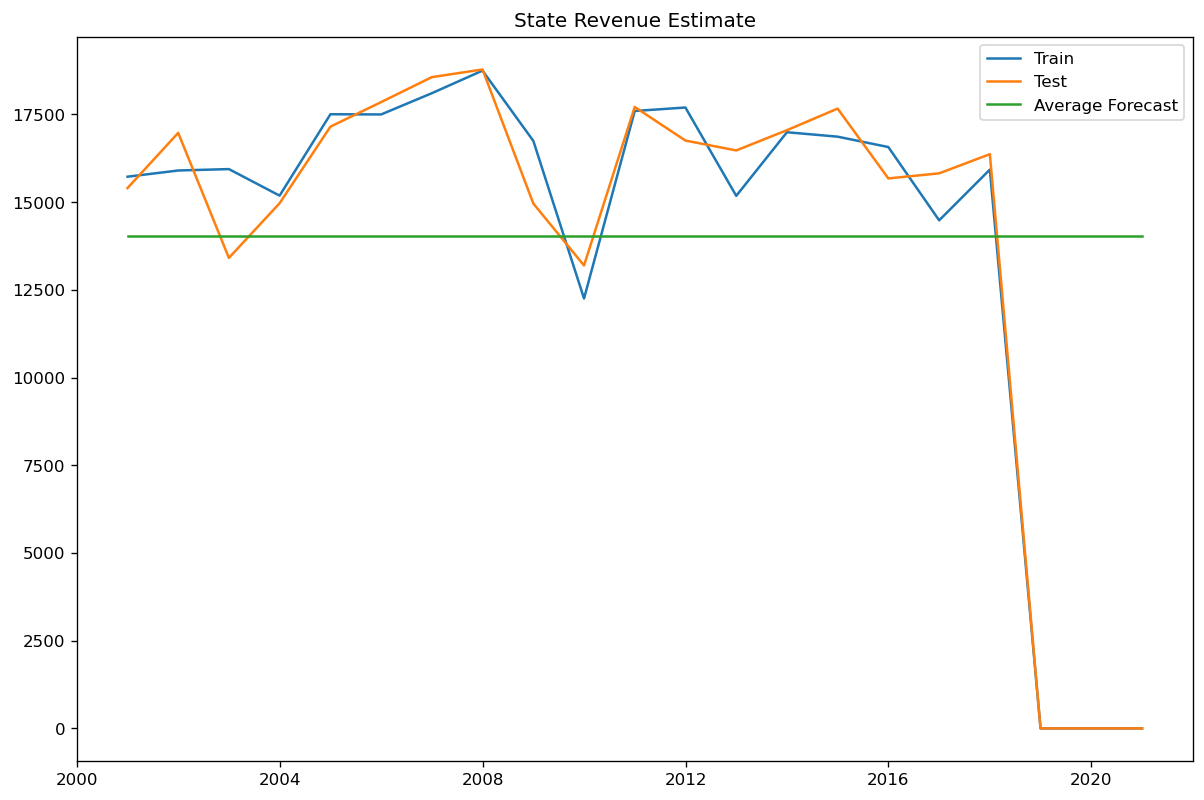

In [300]:
y2 = test.copy()
y2['avg_forecast'] = train['state_revenue_estimate'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['state_revenue_estimate'], label='Train')
plt.plot(test['state_revenue_estimate'], label='Test')
plt.plot(y2['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.title('State Revenue Estimate')
plt.show()

In [301]:
test['state_revenue_estimate'].fillna(0,inplace = True)
y2['avg_forecast'].fillna(0,inplace = True)

In [302]:
rms = sqrt(mean_squared_error(test['state_revenue_estimate'], y2['avg_forecast']))
print(rms)

5904.7294964849625


Simple exponential smoothing time series

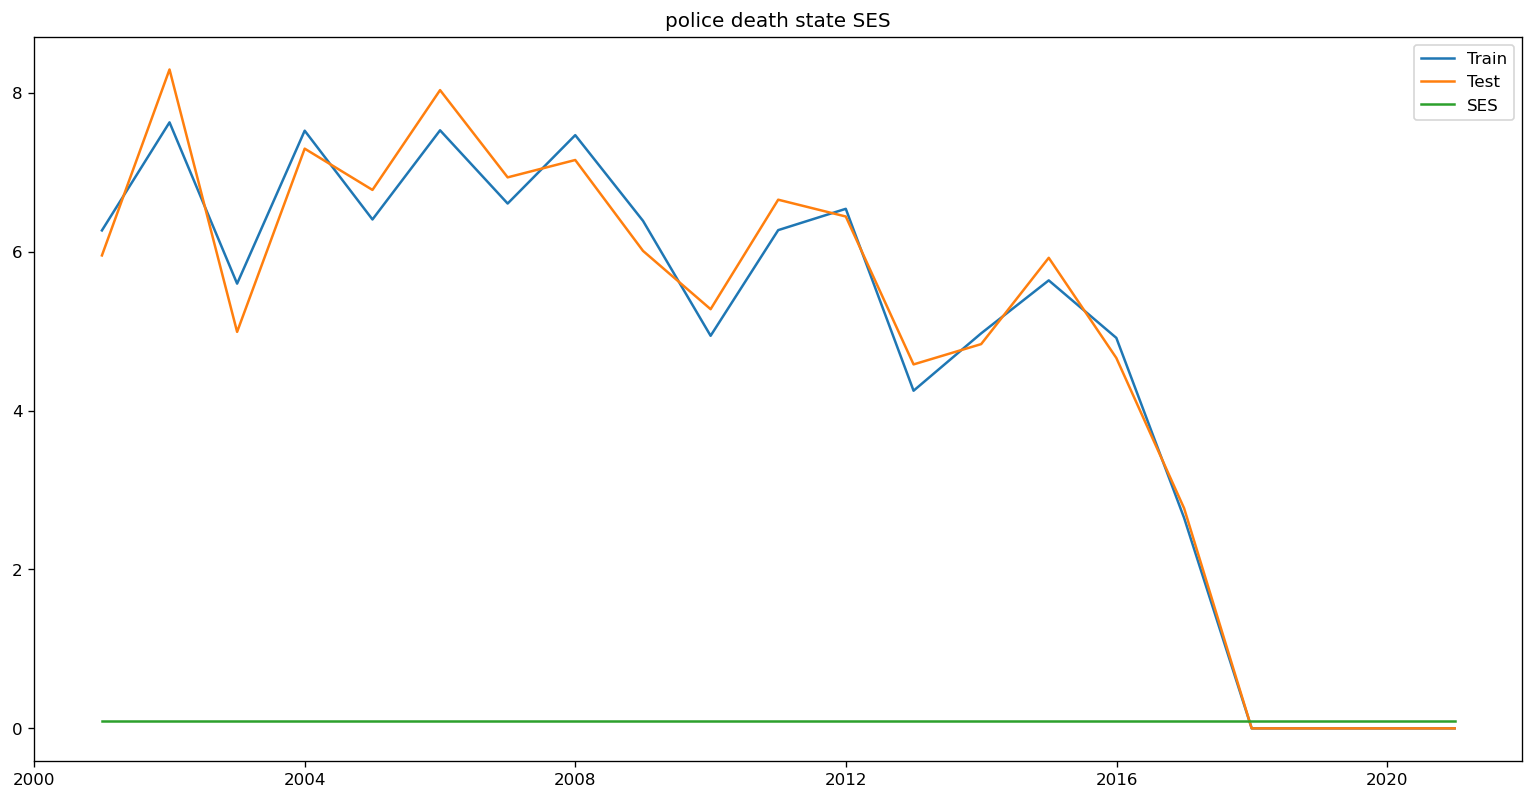

In [303]:
from statsmodels.tsa.api import SimpleExpSmoothing
 
y3 = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['police_death_state_num'])).fit(smoothing_level=0.6, optimized=False)
y3['SES'] = fit.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['police_death_state_num'], label='Train')
plt.plot(test['police_death_state_num'], label='Test')
plt.plot(y3['SES'], label='SES')
plt.legend(loc='best')
plt.title('police death state SES')
plt.show()

In [304]:
test['police_death_state_num'].fillna(0,inplace = True)
y3['SES'].fillna(0,inplace = True)
rms = sqrt(mean_squared_error(test['police_death_state_num'], y3['SES']))
print(rms)

5.485593618318173


HoltWinters exponential smoothing times series

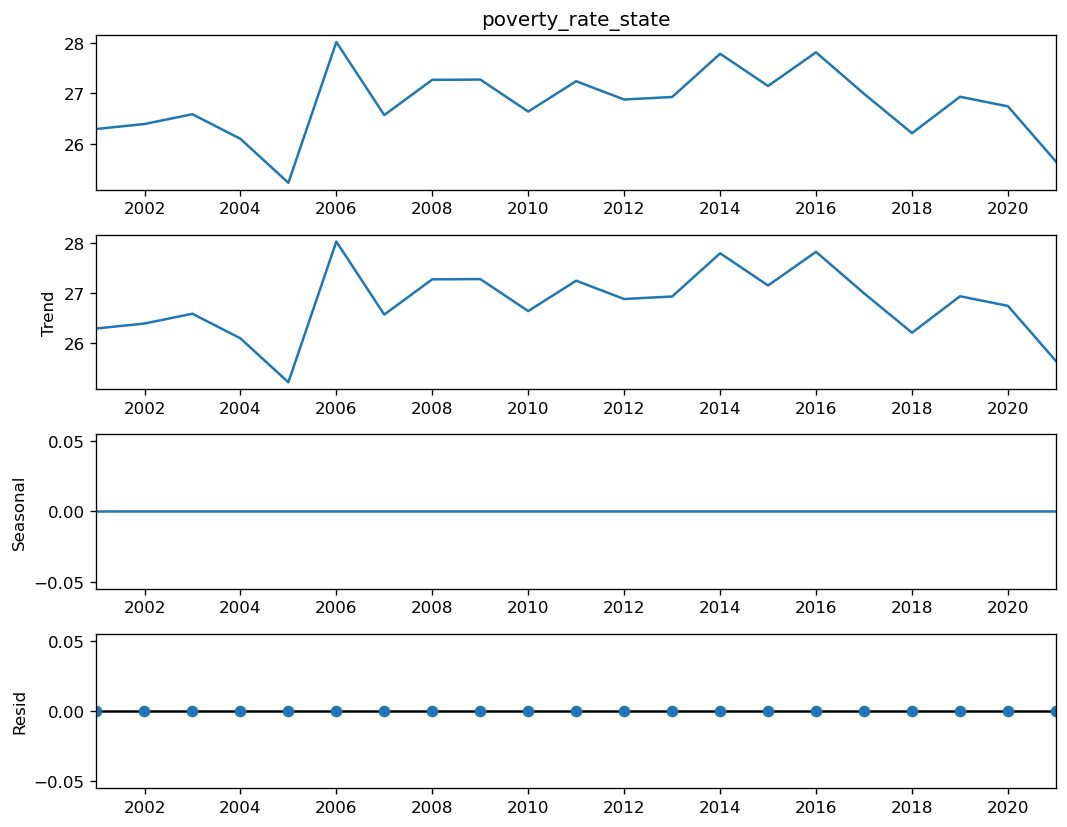

In [311]:
import statsmodels.api as sm
 
sm.tsa.seasonal_decompose(train['poverty_rate_state']).plot()
result = sm.tsa.stattools.adfuller(train['poverty_rate_state'])
plt.show()

C:\Users\Minghan.Tang\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


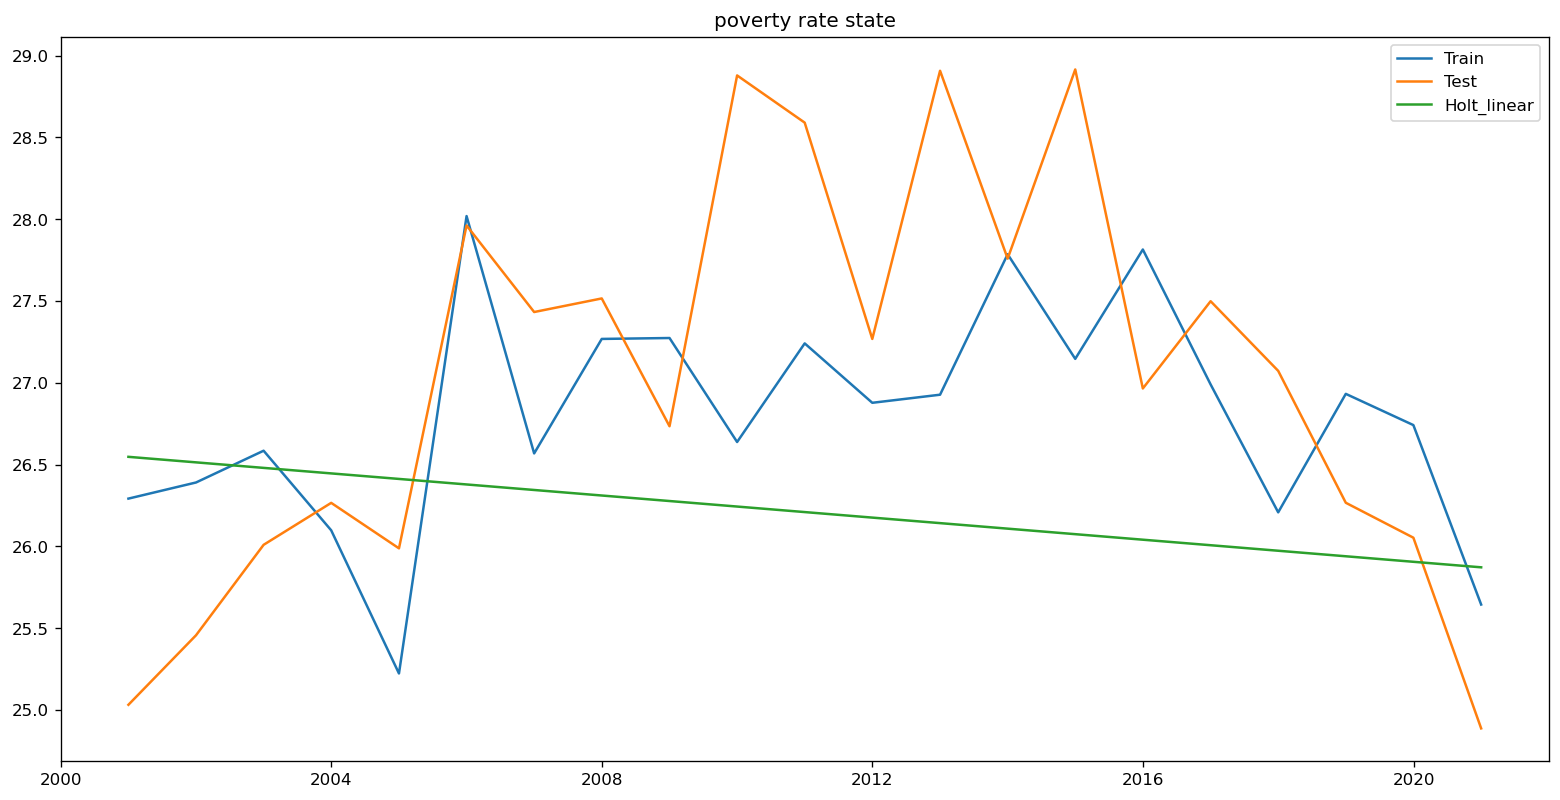

In [312]:
from statsmodels.tsa.api import Holt
 
y4 = test.copy()
 
fit = Holt(np.asarray(train['poverty_rate_state'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y4['Holt_linear'] = fit.forecast(len(test))
 
plt.figure(figsize=(16, 8))
plt.plot(train['poverty_rate_state'], label='Train')
plt.plot(test['poverty_rate_state'], label='Test')
plt.plot(y4['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("poverty rate state")
plt.show()

In [307]:
rms = sqrt(mean_squared_error(test['poverty_rate_state'], y4['Holt_linear']))
print(rms)

1.4937975842300268


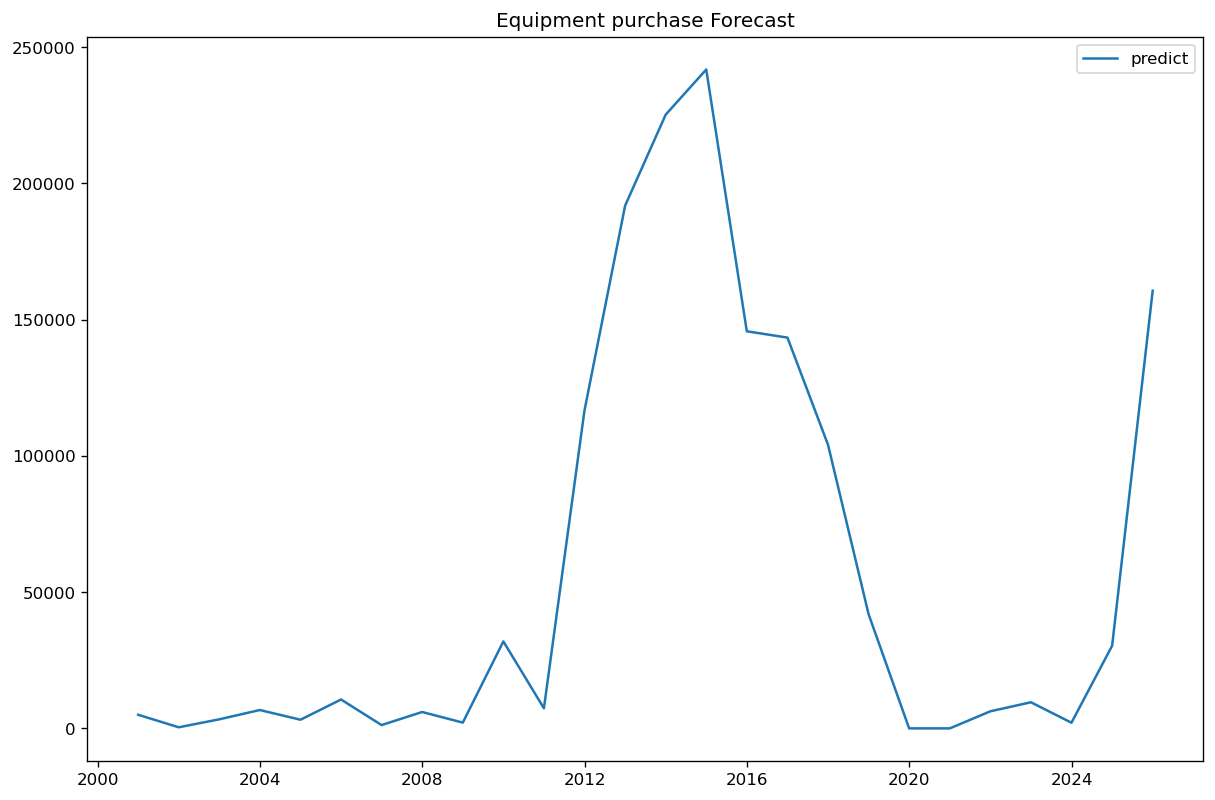

In [344]:
dt1 = np.asarray(train['equipment_purchase'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['equipment_purchase'], label='predict')
plt.legend(loc='best')
plt.title("Equipment purchase Forecast")
plt.show()

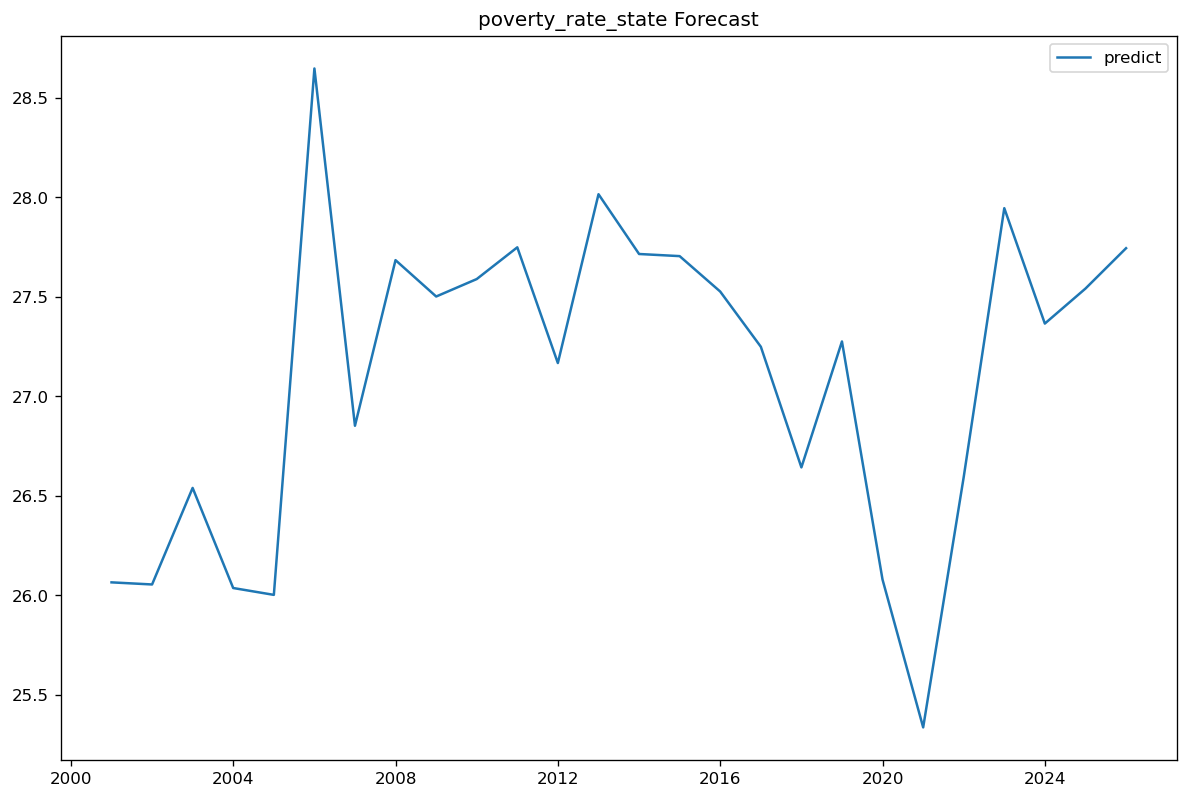

In [346]:
dt1 = np.asarray(train['poverty_rate_state'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['poverty_rate_state'], label='predict')
plt.legend(loc='best')
plt.title("poverty_rate_state Forecast")
plt.show()

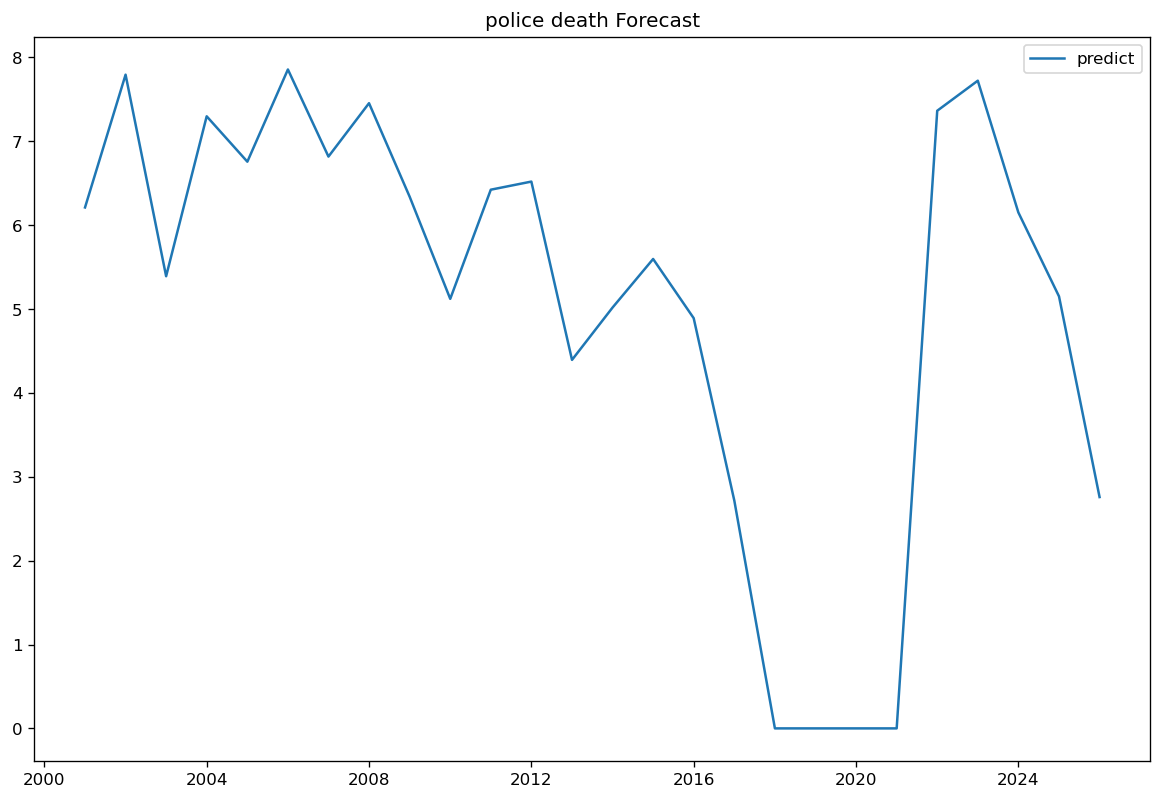

In [347]:
dt1 = np.asarray(train['police_death_state_num'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['police_death_state_num'], label='predict')
plt.legend(loc='best')
plt.title("police death Forecast")
plt.show()

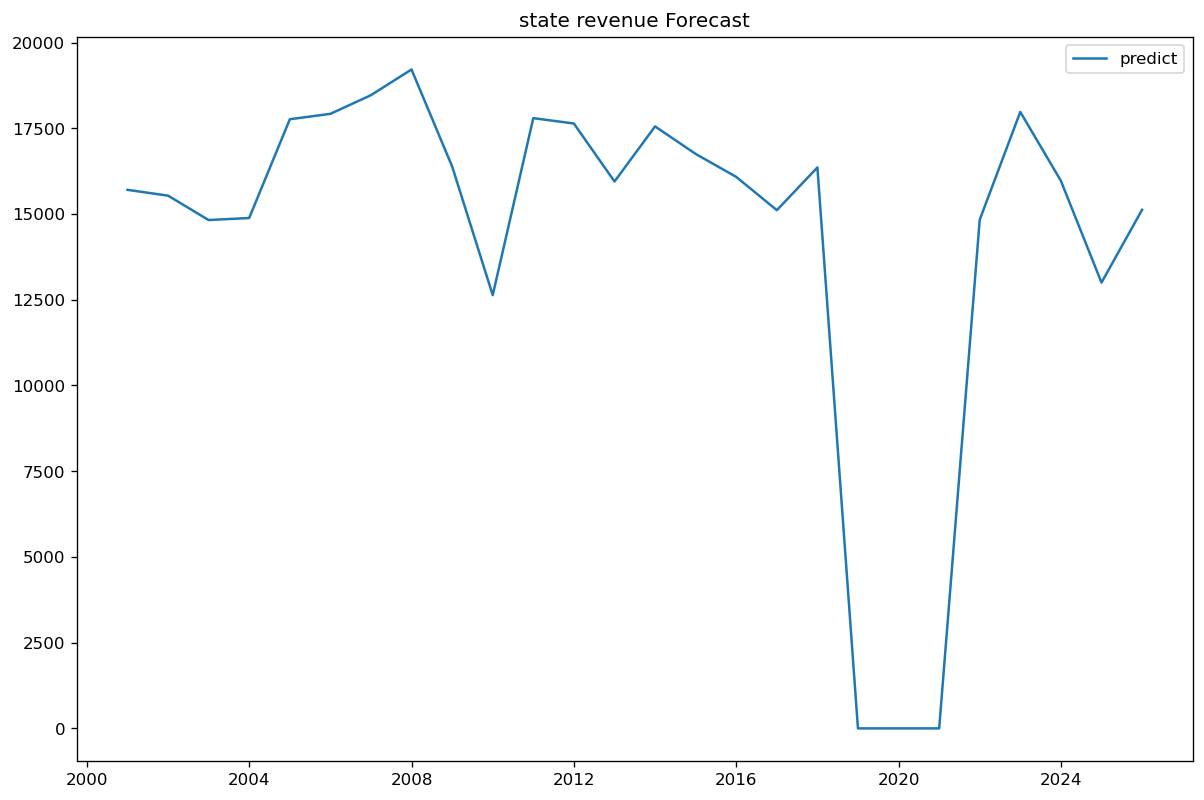

In [348]:
dt1 = np.asarray(train['state_revenue_estimate'])
y1= test.copy()
y1['naive'] = dt1[len(dt1) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['state_revenue_estimate'], label='predict')
plt.legend(loc='best')
plt.title("state revenue Forecast")
plt.show()